### packages

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score
from mpl_toolkits.mplot3d import Axes3D


# Data pre-processing
전체 데이터셋: train, 서비스업: service, 일반업: normal, 제조업: product 

In [2]:
train = pd.read_excel('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/DATA/데이터/기술통계19.xlsx',index_col='global_id')
service = pd.read_excel('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/DATA/데이터/실태조사_서비스업19.xlsx',index_col='global_id')
normal = pd.read_excel('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/DATA/데이터/실태조사_일반항목19.xlsx',index_col='global_id')
product = pd.read_excel('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/DATA/데이터/실태조사_제조업19.xlsx',index_col='global_id')

In [3]:
print('기술통계자료의 데이터 개수 train: {}'.format(len(train)))
print('실태조사 자료 데이터의 개수 sevice:{}, normal:{}, product:{}'.format(len(service), len(normal), len(product)))

기술통계자료의 데이터 개수 train: 3994
실태조사 자료 데이터의 개수 sevice:8500, normal:4000, product:7500


### 기술통계조사와 실태조사 자료의 중복자료 추출

In [4]:
warnings.filterwarnings(action='ignore')
print('기술통계조사와 실태조사 자료의 중복항목 수는 다음과 같다.')
companys = [service, normal, product]
for i in range(len(companys)):
    line = []
    for index in train.index:
        if index in companys[i].index:
            line.append(index)
        else:
            line.append(0)
    if i == 0:
        service_train =train[train.index == line]
        service_train['bt'] = 0
        print('서비스업종 데이터: {}'.format(len(service_train)))
    elif i == 1:
        normal_train =train[train.index == line]
        normal_train['bt'] = 1
        print('일반업종 데이터: {}'.format(len(normal_train)))
    else:
        product_train =train[train.index == line]
        product_train['bt'] = 2
        print('제조업종 데이터: {}'.format(len(product_train)))

기술통계조사와 실태조사 자료의 중복항목 수는 다음과 같다.
서비스업종 데이터: 195
일반업종 데이터: 183
제조업종 데이터: 834


### 데이터 병합

In [5]:
train = pd.concat([service_train, normal_train, product_train])
index_list = ['A1S1', 'A1N1', 'C2S2', 'H1_1', 'H4_1', 'I4Q1', 'I4Q2',  'I4Q3', 'I4Q4', 'I4Q5', 'I4Q6', 'I4Q7']
my_train = train.loc[:, index_list]

### 결측치 최빈값 처리

In [6]:
for index in index_list:
    freq = my_train[index].value_counts(dropna=True).idxmax()
    my_train[index].fillna(freq, inplace = True)

### 응답범주 축소화

In [7]:
warnings.filterwarnings(action='ignore')

my_train['A1S1'][(my_train['A1S1']==1) | (my_train['A1S1']==2)] = 1
my_train['A1S1'][my_train['A1S1']==3] = 2
my_train['A1S1'][(my_train['A1S1']==4) | (my_train['A1S1']==5)| (my_train['A1S1']==6)] = 3
my_train['A1S1'][my_train['A1S1']==7] = 4

my_train['A1N1'] [(my_train['A1N1']==1) | (my_train['A1N1']==2)] = 1
my_train['A1N1'] [(my_train['A1N1']==10) | (my_train['A1N1']==11)] = 2
my_train['A1N1'] [(my_train['A1N1']==5) | (my_train['A1N1']==6)| (my_train['A1N1']==12| (my_train['A1N1']==8| (my_train['A1N1']==9)))] = 3
my_train['A1N1'] [(my_train['A1N1']==3) | (my_train['A1N1']==7)] = 4
my_train['A1N1'] [(my_train['A1N1']==13) | (my_train['A1N1']==14)| (my_train['A1N1']==15)] = 5

my_train['C2S2'][(my_train['C2S2']==2) | (my_train['C2S2']==4)] = 2

my_train['H1_1'][(my_train['H1_1']==2) | (my_train['H1_1']==3)] = 1
my_train['H1_1'][(my_train['H1_1']==4) | (my_train['H1_1']==5)| (my_train['H1_1']==6)| (my_train['H1_1']==7)] = 2
my_train['H1_1'][(my_train['H1_1']==1)] = 3
my_train['H1_1'][(my_train['H1_1']==9) | (my_train['H1_1']==8)]= 4

my_train['H4_1'][(my_train['H4_1']==1) | (my_train['H4_1']==3)] = 1
my_train['H4_1'][(my_train['H4_1']==4)] = 2
my_train['H4_1'][(my_train['H4_1']==5) | (my_train['H4_1']==6)] = 3
my_train['H4_1'][(my_train['H4_1']==2)] = 4
my_train['H4_1'][(my_train['H4_1']==7) | (my_train['H4_1']==9)] = 5
my_train['H4_1'][(my_train['H4_1']==8) | (my_train['H4_1']==10)] = 6

my_train['I4Q1'][(my_train['I4Q1']==3) | (my_train['I4Q1']==4)] = 1
my_train['I4Q1'][(my_train['I4Q1']==2)] = 2
my_train['I4Q1'][(my_train['I4Q1']==1)] = 3

my_train['I4Q2'][(my_train['I4Q2']==3) | (my_train['I4Q2']==4)] = 1
my_train['I4Q2'][(my_train['I4Q2']==2)] = 2
my_train['I4Q2'][(my_train['I4Q2']==1)] = 3

my_train['I4Q3'][(my_train['I4Q3']==3) | (my_train['I4Q3']==4)] = 1
my_train['I4Q3'][(my_train['I4Q3']==2)] = 2
my_train['I4Q3'][(my_train['I4Q3']==1)] = 3

my_train['I4Q4'][(my_train['I4Q4']==3) | (my_train['I4Q4']==4)] = 1
my_train['I4Q4'][(my_train['I4Q4']==2)] = 2
my_train['I4Q4'][(my_train['I4Q4']==1)] = 3

my_train['I4Q5'][(my_train['I4Q5']==3) | (my_train['I4Q5']==4)] = 1
my_train['I4Q5'][(my_train['I4Q5']==2)] = 2
my_train['I4Q5'][(my_train['I4Q5']==1)] = 3

my_train['I4Q6'][(my_train['I4Q6']==3) | (my_train['I4Q6']==4)] = 1
my_train['I4Q6'][(my_train['I4Q6']==2)] = 2
my_train['I4Q6'][(my_train['I4Q6']==1)] = 3

my_train['I4Q7'][(my_train['I4Q7']==3) | (my_train['I4Q7']==4)] = 1
my_train['I4Q7'][(my_train['I4Q7']==2)] = 2
my_train['I4Q7'][(my_train['I4Q7']==1)] = 3

print(my_train.head(3))

           A1S1  A1N1  C2S2  H1_1  H4_1  I4Q1  I4Q2  I4Q3  I4Q4  I4Q5  I4Q6  \
global_id                                                                     
111016.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111037.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111039.0    3.0   4.0   3.0   3.0   5.0   3.0   3.0   3.0   3.0   3.0   3.0   

           I4Q7  
global_id        
111016.0    3.0  
111037.0    3.0  
111039.0    3.0  


### 완성된 데이터원본 저장해놓기

In [8]:
my_train_original = my_train[:]

# K-MEANS 클러스터

In [9]:
model = KMeans(n_clusters=3)
model.fit(my_train)
kmeans_predict = model.fit_predict(my_train)
my_train['k_means'] = kmeans_predict
print(my_train.groupby('k_means').size())

k_means
0    849
1    343
2     20
dtype: int64


## K-means + dummy

In [10]:
my_train_dummy = my_train_original[:]
for index in index_list:
    my_train_dummy[index] = my_train_dummy[index].astype(str)
    my_train_dummy = pd.get_dummies(my_train_dummy, columns=[index])

In [11]:
model = KMeans(n_clusters=3)
model.fit(my_train_dummy)
kmeans_dummy_predict = model.fit_predict(my_train_dummy)
my_train['k_means_dummy'] = kmeans_dummy_predict
print(my_train.groupby('k_means_dummy').size())

k_means_dummy
0    253
1    598
2    361
dtype: int64


## K-Means + PCA

In [12]:
my_train_pca = my_train_original[:]
pca = PCA(n_components = 10)
pca.fit(my_train_pca)
# print('singular value :', pca.singular_values_)
# print('singular vector :\n', pca.components_.T)
print('explained variance ratio : \n', pca.explained_variance_ratio_)
percentile = []
for i in pca.explained_variance_ratio_:
    if len(percentile) ==0:
        percentile.append(i)
    else:
        percentile.append(percentile[-1]+i)
print(' ')
print('PCA의 데이터반영 누적비율')
print(percentile)

explained variance ratio : 
 [0.318961   0.23951282 0.11738039 0.10428578 0.05561842 0.04536555
 0.03137973 0.02508638 0.02143859 0.01627272]
 
PCA의 데이터반영 누적비율
[0.31896099752677104, 0.5584738156795982, 0.6758542050584552, 0.78013998445393, 0.8357584027054615, 0.8811239543351679, 0.912503682206646, 0.937590057564122, 0.9590286515428968, 0.975301374379612]


### 따라서 5개부터 시도해보겠음(80%반영! -지극히 주관적)

In [13]:
my_train_pca = my_train_original[:]
pca = PCA(n_components=5).fit(my_train_pca)
my_train_pca_5 = pca.transform(my_train_pca)

In [14]:
model = KMeans(n_clusters=3)
model.fit(my_train_pca_5)
kmeans_pca_predict = model.fit_predict(my_train_pca_5)
my_train['k_means_pca'] = kmeans_pca_predict
print(my_train.groupby('k_means_pca').size())

k_means_pca
0    849
1     20
2    343
dtype: int64


> 그때그때 너무 다른결과가 나오는데 어떻게하지 (코드 돌릴때마다 다름)

> 근데 전체적인 군집에 나눔정도는 비슷(군집번호만바뀜)

## K-means + dummy + PCA 

In [15]:
my_train_dummy_pca = my_train_dummy[:]

pca = PCA(n_components = 10)
pca.fit(my_train_dummy_pca)

# print('singular value :', pca.singular_values_)
# print('singular vector :\n', pca.components_.T)
print('explained variance ratio : \n', pca.explained_variance_ratio_)
percentile = []
for i in pca.explained_variance_ratio_:
    if len(percentile) ==0:
        percentile.append(i)
    else:
        percentile.append(percentile[-1]+i)
print('PCA의 데이터반영 비율의 누적은 아래와같다!')
print(percentile)

explained variance ratio : 
 [0.23509272 0.12013462 0.09408357 0.08814047 0.06633756 0.06310844
 0.05589778 0.05230321 0.04766146 0.0389537 ]
PCA의 데이터반영 비율의 누적은 아래와같다!
[0.2350927195249571, 0.35522734324228655, 0.4493109112940427, 0.5374513815624317, 0.6037889368639298, 0.6668973725927927, 0.7227951562310242, 0.7750983633367577, 0.8227598269764591, 0.8617135297943245]


In [16]:
my_train_dummy_pca = my_train_dummy[:]
pca = PCA(n_components=9).fit(my_train_dummy_pca)
my_train_dummy_pca_9 = pca.transform(my_train_dummy_pca)
model = KMeans(n_clusters=3)
model.fit(my_train_dummy_pca_9)
kmeans_dummy_pca_predict = model.fit_predict(my_train_dummy_pca_9)
my_train['k_means_dummy_pca'] = kmeans_dummy_pca_predict
print(my_train.groupby('k_means_dummy_pca').size())

k_means_dummy_pca
0    363
1    572
2    277
dtype: int64


# 스펙트럴 군집

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
spectral = SpectralClustering(n_clusters=3, n_init=10)
spectral_predict = spectral.fit_predict(my_train)
my_train['Spectral'] = spectral_predict

spectral_dummy_predict = spectral.fit_predict(my_train_dummy)
my_train['Spectral_dummy'] = spectral_dummy_predict

spectral_pca_predict = spectral.fit_predict(my_train_pca)
my_train['Spectral_pca'] = spectral_pca_predict

spectral_dummy_pca_predict = spectral.fit_predict(my_train_dummy_pca)
my_train['Spectral_dummy_pca'] = spectral_dummy_pca_predict

print(my_train.head(3))
print('------------------------------------------------------------------------------------')
print(my_train.groupby('Spectral').size())
# print('-----------------------------')
print(my_train.groupby('Spectral_dummy').size())
print('-----------------------------')
print(my_train.groupby('Spectral_pca').size())
print('-----------------------------')
print(my_train.groupby('Spectral_dummy_pca').size())
# my_train.to_csv('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/0423/kyumin/cluster_result.csv', index=True)

           A1S1  A1N1  C2S2  H1_1  H4_1  I4Q1  I4Q2  I4Q3  I4Q4  I4Q5  I4Q6  \
global_id                                                                     
111016.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111037.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111039.0    3.0   4.0   3.0   3.0   5.0   3.0   3.0   3.0   3.0   3.0   3.0   

           I4Q7  k_means  k_means_dummy  k_means_pca  k_means_dummy_pca  \
global_id                                                                 
111016.0    3.0        0              1            0                  1   
111037.0    3.0        0              1            0                  1   
111039.0    3.0        1              1            2                  1   

           Spectral  Spectral_dummy  Spectral_pca  Spectral_dummy_pca  
global_id                                                              
111016.0          0               0             0                   2  
111037.0    

>  혹시몰라서 int로도 string으로도 해봤으나 결과 값은 똑같다!

# 시각화 ( 결과 판단)

### k-means

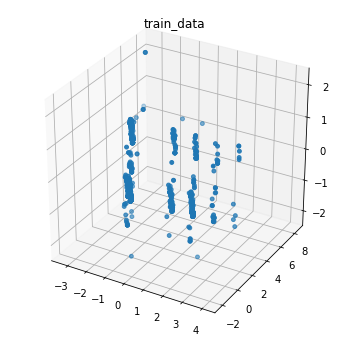

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


In [30]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show) #2개로 진행해봄
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2], marker='o', s=15)
ax.set_title('train_data')
plt.show()


### K-means_dummy

k_means
0    849
1    343
2     20
dtype: int64


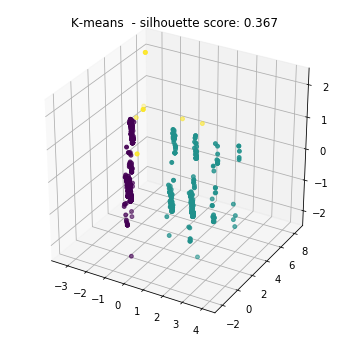

In [20]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show) 
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_predict, marker='o', s=15)

ax.set_title('K-means  - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, kmeans_predict))) 
print(my_train.groupby('k_means').size())
plt.show()


k_means_dummy
0    253
1    598
2    361
dtype: int64


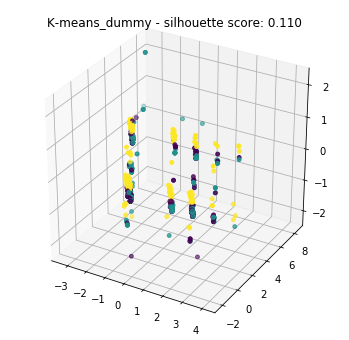

In [21]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_predict, marker='o', s=15)

ax.set_title('K-means_dummy - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, kmeans_dummy_predict))) 
print(my_train.groupby('k_means_dummy').size())
plt.show()

k_means_pca
0    849
1     20
2    343
dtype: int64


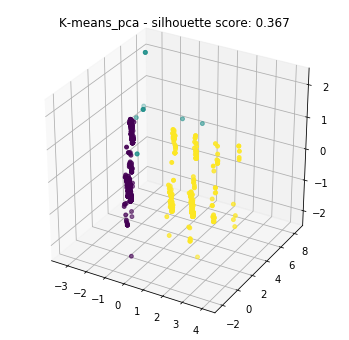

In [22]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_pca_predict, marker='o', s=15)
ax.set_title('K-means_pca - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, kmeans_pca_predict))) 
print(my_train.groupby('k_means_pca').size())
plt.show()

k_means_dummy_pca
0    363
1    572
2    277
dtype: int64


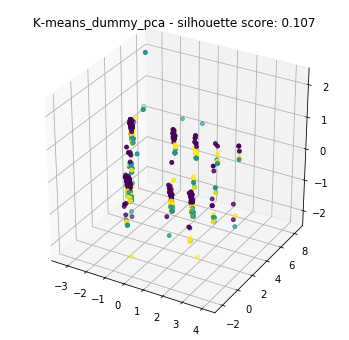

In [23]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_pca_predict, marker='o', s=15)
ax.set_title('K-means_dummy_pca - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, kmeans_dummy_pca_predict))) 
print(my_train.groupby('k_means_dummy_pca').size())
plt.show()

Spectral
0    1192
1       4
2      16
dtype: int64


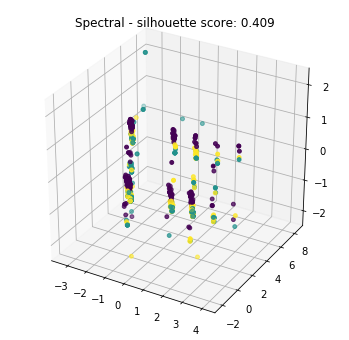

In [24]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_pca_predict, marker='o', s=15)
ax.set_title('Spectral - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, spectral_predict))) 
print(my_train.groupby('Spectral').size())
plt.show()

Spectral_dummy
0    881
1      2
2    329
dtype: int64


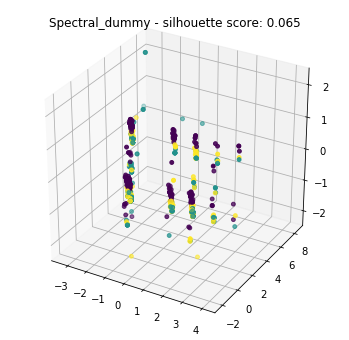

In [25]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_pca_predict, marker='o', s=15)
ax.set_title('Spectral_dummy - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, spectral_dummy_predict))) 
print(my_train.groupby('Spectral_dummy').size())

plt.show()

Spectral_pca
0    1192
1       4
2      16
dtype: int64


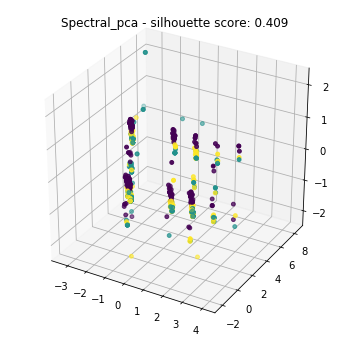

In [26]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_pca_predict, marker='o', s=15)
ax.set_title('Spectral_pca - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, spectral_pca_predict))) 
print(my_train.groupby('Spectral_pca').size())
plt.show()

Spectral_dummy_pca
0    329
1      2
2    881
dtype: int64


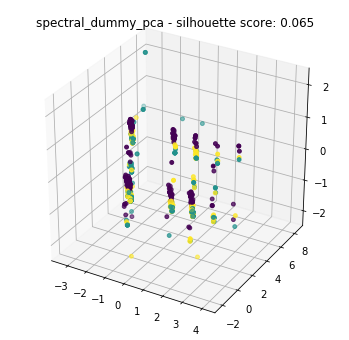

In [27]:
my_train_show = my_train_original[:]
pca = PCA(n_components=3).fit(my_train_show)
pca_train = pca.transform(my_train_show)
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_train[:, 0], pca_train[:, 1], pca_train[:,2],  c=kmeans_dummy_pca_predict, marker='o', s=15)
ax.set_title('spectral_dummy_pca - silhouette score: {:.3f}'.format(silhouette_score(my_train_show, spectral_dummy_pca_predict))) 
print(my_train.groupby('Spectral_dummy_pca').size())
plt.show()

## 전체결과 출력 및 저장

In [28]:
print(my_train.head(3))
my_train.to_csv('C:/Users/user/Desktop/Statistical_Data_Idea_Contest/0423/kyumin/cluster_result.csv', index=True)

           A1S1  A1N1  C2S2  H1_1  H4_1  I4Q1  I4Q2  I4Q3  I4Q4  I4Q5  I4Q6  \
global_id                                                                     
111016.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111037.0    1.0   4.0   2.0   3.0   1.0   3.0   3.0   3.0   3.0   3.0   3.0   
111039.0    3.0   4.0   3.0   3.0   5.0   3.0   3.0   3.0   3.0   3.0   3.0   

           I4Q7  k_means  k_means_dummy  k_means_pca  k_means_dummy_pca  \
global_id                                                                 
111016.0    3.0        0              1            0                  1   
111037.0    3.0        0              1            0                  1   
111039.0    3.0        1              1            2                  1   

           Spectral  Spectral_dummy  Spectral_pca  Spectral_dummy_pca  
global_id                                                              
111016.0          0               0             0                   2  
111037.0    

> 실루엣스코어는 `https://woolulu.tistory.com/50`  여기참고하자